# Scattering by one GNP with a protein sphere
## Evaluate the total scattreing properties

## Load modules 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
%matplotlib inline
import matplotlib
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [23]:
def compare_mie(qextv, qextv2, wv2, dv2, ylabel, scale='log',title1='One GNP', title2='GNP+Protein', title3='Two/One'):
    num_plots=len(dv2)
    nd=len(dv2)
    
    colormap = plt.cm.gist_ncar
    plt.figure(figsize=(9,3))
    
    ax=plt.subplot(131)
    ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv)
    plt.ylabel(ylabel)
    plt.xlabel("Wavelength(nm)")
    plt.title(title1)
    
    ax=plt.subplot(132)
    ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv2)
    plt.xlabel("Wavelength(nm)")
    plt.title(title2)
    
    plt.subplot(133)
    #ax.set_yscale(scale)
    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

    plt.plot(wv2,qextv2/qextv)
    #for j in range(nd):
    #    tmp=plt.plot(wv2,(qextv-qextv2)[:,j], label=str(dv2[j])+'nm')

    plt.title(title3)
    plt.xlabel("Wavelength(nm)")
    #plt.legend(bbox_to_anchor=(1.3,1.2),title="Diameter")
        
    #plt.plot(wv2,qextv2)
    plt.tight_layout()
    
def plot_2p(wv2, qextv,qextv2, scale='linear',label1='GNP', label2='GNP+Protein', idvv=[0,1,2,3],figsize=(6,9)):
    n1=len(idvv)
    plt.figure(figsize=figsize)
    for j,idv in enumerate(idvv):
        
        ax=plt.subplot(n1,1, j+1)
        ax.set_yscale(scale)
        plt.plot(wv2,qextv[:,idv],label=label1)
        plt.plot(wv2,qextv2[:,idv],label=label2)
        plt.title("Diameter(nm)(GNP:%3.2f,Protein:%3.2f)"%(dv2[idv],10))
        plt.xlabel("Wavelength(nm)")
        plt.ylabel("$Q_{ext}$")
        plt.legend(bbox_to_anchor=(1.0,1.0))
    plt.tight_layout()
def plot_gnp(ax,r1,r2,dr=0):
    circle1 = plt.Circle((r1, 0), r1, color='r',clip_on=False, alpha=0.5)
    circle2 = plt.Circle((-r2, 0), r2+dr, color='b',clip_on=False, alpha=0.5)

    # (or if you have an existing figure)
    # fig = plt.gcf()
    # ax = fig.gca()

    ax.add_artist(circle1)
    ax.add_artist(circle2)

## One spherical gold nano particle(GNP) results 

In [3]:
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

## single sphere
[nv2, kv2, wv2, dv2, datav]=pickle.load(open("../data/gold_mie.pkl", "rb" ))
[qextv,qscav, qabsv, qbackv,gv]=datav

## Scattering of a spherical protein

Protein is approximated as a sphere with diamter 10nm and refractive index 1.45+0.0i

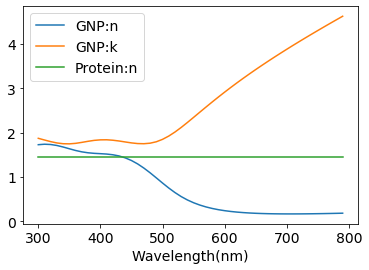

In [49]:
import PyMieScatt as ps

def run_mie(nv, kv, wv, dv):
    nd=len(dv)
    nwv=len(wv)
    
    #run the mie code for above parameters
    miev=np.array([[ps.MieQ(nv[i]+kv[i]*1.0j,wv[i],dv[j],asDict=True) \
                    for j in range(nd)] \
                   for i in range(nwv)])

    qextv=np.array([[miev[i,j]['Qext'] for j in range(nd)]for i in range(nwv)])
    qscav=np.array([[miev[i,j]['Qsca'] for j in range(nd)]for i in range(nwv)])
    qabsv=np.array([[miev[i,j]['Qabs'] for j in range(nd)]for i in range(nwv)])
    qbackv=np.array([[miev[i,j]['Qback'] for j in range(nd)]for i in range(nwv)])
    gv=np.array([[miev[i,j]['g'] for j in range(nd)]for i in range(nwv)])

    return [qextv,qscav, qabsv, qbackv,gv]

#refractive index for protein 1.45+0.0i
nv1=np.repeat(1.45,len(nv2))
kv1=np.zeros(len(kv2))
[qextv1,qscav1, qabsv1, qbackv1,gv1]=run_mie(nv1, kv1, wv2, dv2)

plt.plot(wv2, nv2,label='GNP:n')
plt.plot(wv2, kv2,label='GNP:k')
plt.plot(wv2,nv1,label='Protein:n')
plt.xlabel("Wavelength(nm)")
plt.legend()

Text(0, 0.5, 'Qext')

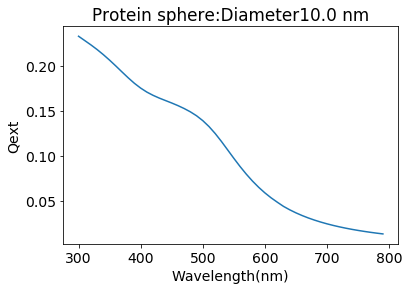

In [46]:
plt.plot(wv2,qextv1[:,0])
plt.title("Protein sphere:Diameter%3.1f nm" % dv2[0])
plt.xlabel("Wavelength(nm)")
plt.ylabel("Qext")

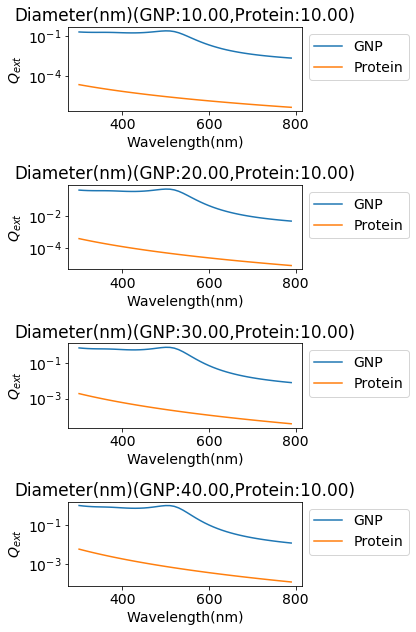

In [50]:
#compare with gnp
plot_2p(wv2, qextv,qextv1,label2='Protein',scale='log', idvv=[0,1,2,3])

## Create new script to attach one protein sphere with fixed size to GNP

### MSTM input file for spheres with different refractive index

- sphere_position_file: if the file is empty, then positons will be defined in the input file by sphere_sizes_and_positions:
radius, x, y, z, real, imag

- length_scale_factor: $2 \pi/\lambda$,
multiple above radius, x, y, z
- real_ref_index_scale_factor
multiple above real refractive index
- imag_ref_index_scale_factor
multiple above imaginary refractive index

In [4]:
import pickle
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

(50, 6)

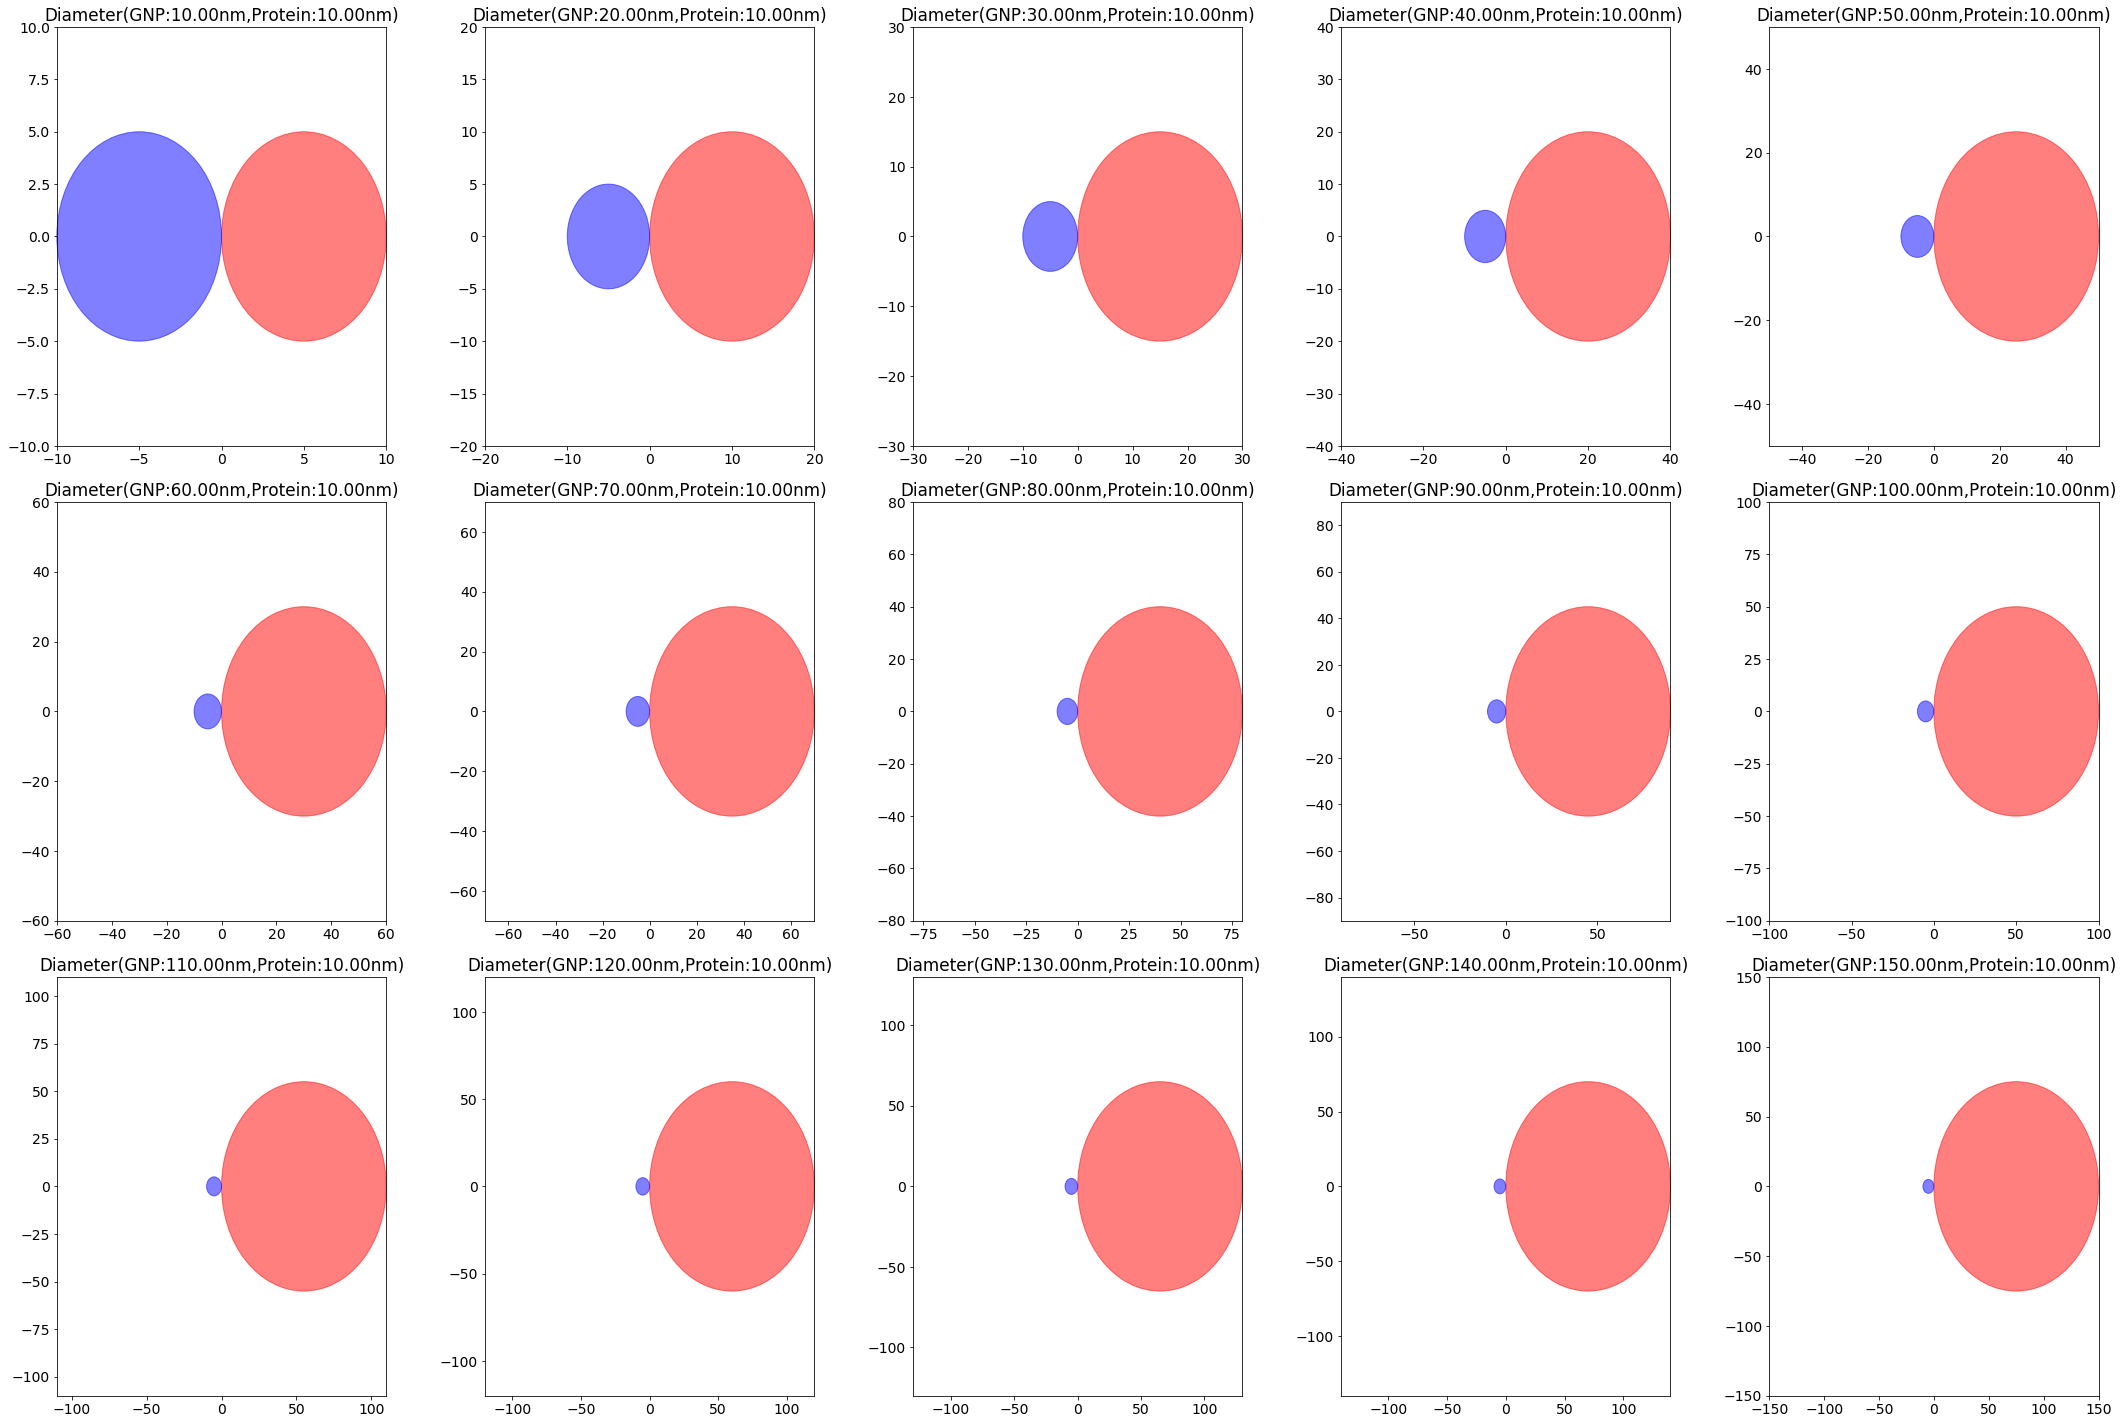

In [74]:
fig=plt.figure(figsize=(30,20))

for idv in range(15):
    #ax = plt.subplot(1,len(dv2),idv+1) # note we must use plt.subplots, not plt.subplot
    #ax=fig.add_subplot(1,len(dv2),idv+1)
    ax=fig.add_subplot(3,5,idv+1)
    r1=dv2[idv]/2
    r2=10/2
    plot_gnp(ax,r1,r2)
    x1=r1*2
    plt.xlim(-x1,x1)
    plt.ylim(-x1,x1)
    plt.title("Diameter(GNP:%3.2fnm,Protein:%3.2fnm)"%(dv2[idv],10))
plt.tight_layout()
#fig.savefig('plotcircles.png')

In [27]:
%%writefile "../data/base2p.inp" 
base file

Writing ../data/base2p.inp


In [32]:
2*np.pi/wv2[iwv]

0.020943951023931952

In [43]:
##this script will be copy to the server for generating MSTM scripts 
import shutil
#base file will the created with basic paratmers for MSTM
src_file='../data/base2p.inp'

#add parameters for refractive index and size
for iwv in range(len(wv2)):
    for idv in range(len(dv2)):
        #print(iwv, nkd[iwv,0], nkd[iwv,1])

        new_file='test_w'+str(iwv)+'_d'+str(idv)+'.inp'
        #print("copy to new file:", new_file)
        shutil.copy(src_file,new_file)

        f1 = open(new_file, 'a')
        f1.write("output_file\n")
        f1.write("outw"+str(iwv)+'_d'+str(idv)+".dat\n")
        f1.write("real_ref_index_scale_factor\n")
        f1.write("%5.5f\n"% 1)
        f1.write("imag_ref_index_scale_factor\n")
        f1.write("%5.5f\n"% 1)
        f1.write("number_spheres\n")
        f1.write("2\n")
        f1.write("length_scale_factor\n")
        scale1=2.0*np.pi/wv2[iwv]
        f1.write("%5.5f\n" % scale1)
        f1.write("sphere_sizes_and_positions\n")
        f1.write("%5.5f %5.5f %5.5f %5.5f %5.5f %5.5f\n"% (dv2[idv]/2, 0.0, 0.0, dv2[idv]/2, nkd[iwv,1], nkd[iwv,2]))
        f1.write("%5.5f %5.5f %5.5f %5.5f %5.5f %5.5f\n"% (10.0/2, 0.0, 0.0, -10.0/2, 1.45, 0))
        #add extra size to the last size to ensure it is included
        f1.write('end_of_options')
        f1.close()

The first test results in wrong dimension of particle radius. After correct the script with the last radius size extended by half step size. All is good

### GNP+protein sphere(10nm diamter) touch

In [62]:
pd1=pd.read_csv("../data/t04_gnp_with_protein_d0.summary",delim_whitespace=True)
pd1=pd1.loc[(pd1['total']!='total')]
#unpolarized total ext, abs, scat efficiencies, w.r.t. xv, and asym. parm
pd1=pd.DataFrame(pd1.values.astype('float')[:,:4],columns=("Qext", "Qabs", "Qsca","Asymmetry"))

nwv=len(nkd)
qextv2=pd1['Qext'].values.reshape(nwv, -1)
qscav2=pd1['Qsca'].values.reshape(nwv, -1)
qabsv2=pd1['Qabs'].values.reshape(nwv, -1)
qg2=pd1['Asymmetry'].values.reshape(nwv, -1)

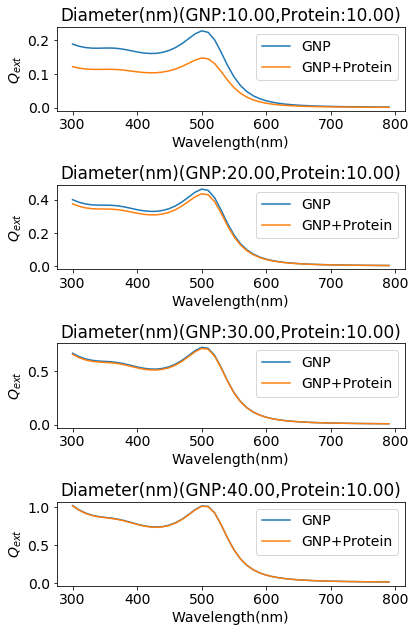

In [134]:
plot_2p(wv2, qextv,qextv2, idvv=[0,1,2,3])

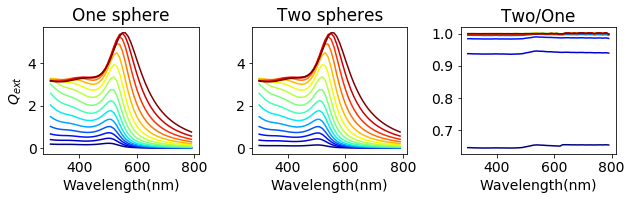

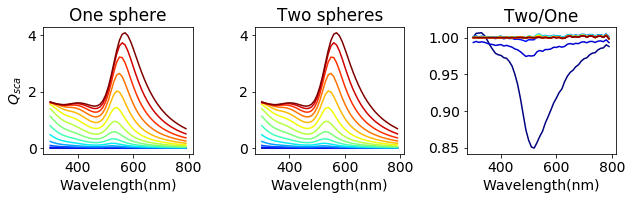

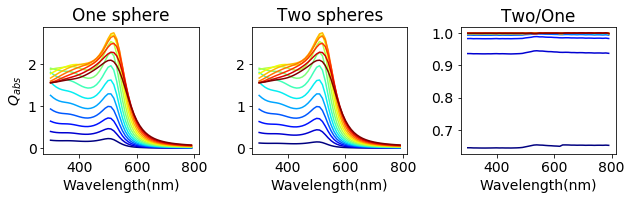

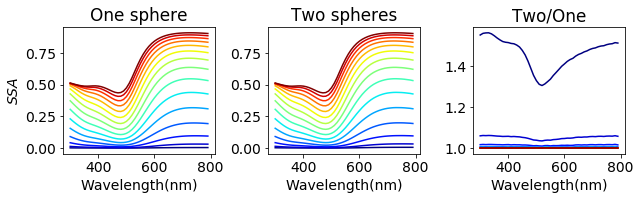

In [60]:
#plot q in log scale
compare_mie(qextv,qextv2, wv2,dv2, ylabel="$Q_{ext}$",scale='linear')
compare_mie(qscav,qscav2, wv2,dv2, ylabel="$Q_{sca}$",scale='linear')
compare_mie(qabsv,qabsv2, wv2,dv2, ylabel="$Q_{abs}$",scale='linear')
compare_mie(qscav/qextv,qscav2/qextv2, wv2,dv2, ylabel="$SSA$",scale='linear')

## Two spheres merges

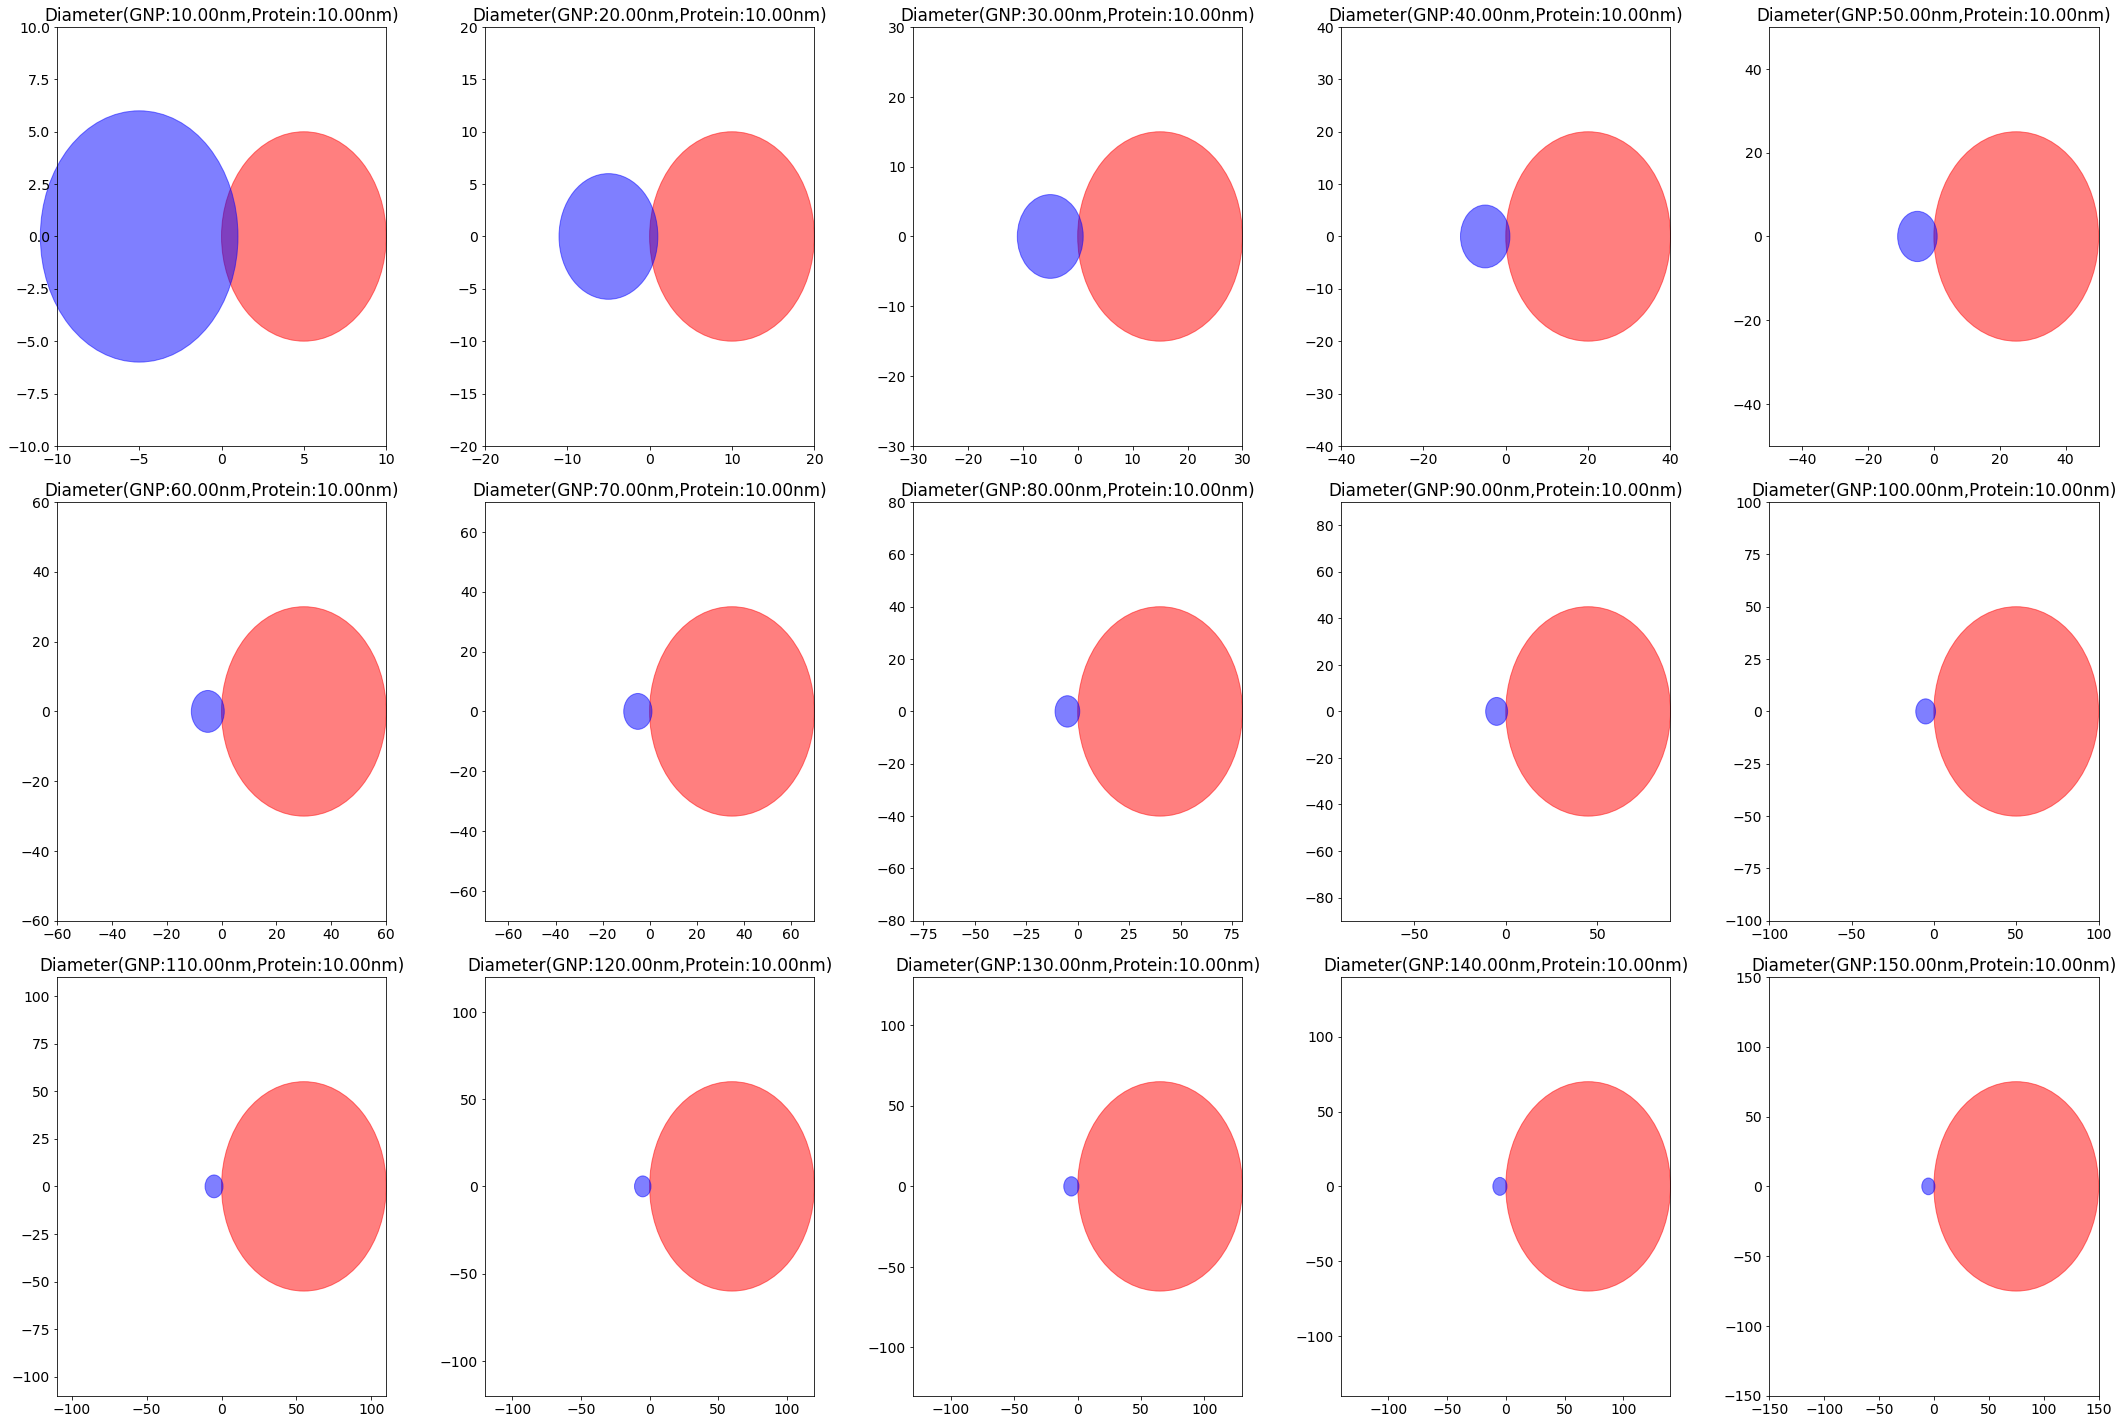

In [89]:
fig=plt.figure(figsize=(30,20))

for idv in range(15):
    #ax = plt.subplot(1,len(dv2),idv+1) # note we must use plt.subplots, not plt.subplot
    #ax=fig.add_subplot(1,len(dv2),idv+1)
    ax=fig.add_subplot(3,5,idv+1)
    r1=dv2[idv]/2
    r2=10/2
    plot_gnp(ax,r1,r2,+1)
    x1=r1*2
    plt.xlim(-x1,x1)
    plt.ylim(-x1,x1)
    plt.title("Diameter(GNP:%3.2fnm,Protein:%3.2fnm)"%(dv2[idv],10))
plt.tight_layout()
#fig.savefig('plotcircles.png')

In [90]:
pd1=pd.read_csv("../data/t04t1_gnp_with_protein_dn1.summary",delim_whitespace=True)
pd1=pd1.loc[(pd1['total']!='total')]
#unpolarized total ext, abs, scat efficiencies, w.r.t. xv, and asym. parm
pd1=pd.DataFrame(pd1.values.astype('float')[:,:4],columns=("Qext", "Qabs", "Qsca","Asymmetry"))

nwv=len(nkd)
qextv3=pd1['Qext'].values.reshape(nwv, -1)
qscav3=pd1['Qsca'].values.reshape(nwv, -1)
qabsv3=pd1['Qabs'].values.reshape(nwv, -1)
qg3=pd1['Asymmetry'].values.reshape(nwv, -1)

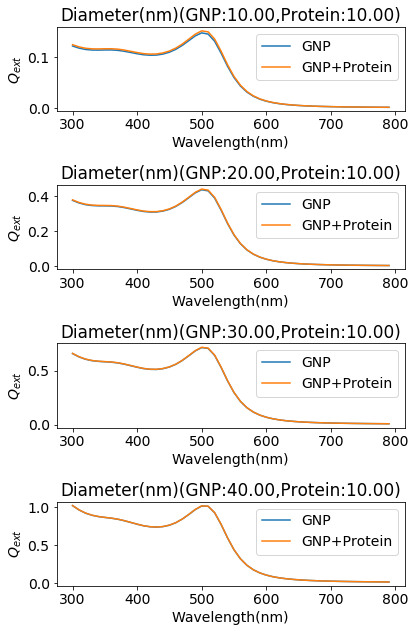

In [135]:
plot_2p(wv2, qextv2,qextv3, idvv=[0,1,2,3])